In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.style.use('classic')
sns.set_theme(style="whitegrid")
# palette="pastel"

In [11]:
path50  = "C:/Users/guill/Documents/Compu/Tesina/RESULTADOS/GSRD/slabmotion/slabmotions15/slabmotions/50/"
path300 = "C:/Users/guill/Documents/Compu/Tesina/RESULTADOS/GSRD/slabmotion/slabmotions15/slabmotions/300/"
path550 = "C:/Users/guill/Documents/Compu/Tesina/RESULTADOS/GSRD/slabmotion/slabmotions15/slabmotions/550/"
path750 = "C:/Users/guill/Documents/Compu/Tesina/RESULTADOS/GSRD/slabmotion/slabmotions15/slabmotions/750/"

In [47]:
path=path750
#################################################### Simulacion
num = 1
Temp = 750
Title = str(num)+'T-' + str(Temp)+'K- '
#################################################### 
Kb = 8.617333262*10**(-5)

capas = 4
at = (capas-1)*6+3

Ecin = at*1.5*Kb*Temp

$E_{cin} = N_{at} * \frac{3}{2} k_{b} T$
$N_{at} = 21$ 

## Lectura de Datos
> Movimiento de los atomos de las primeras 3 capas 
Para cada configuracion del slabmotion se compara con la conf de eq. inicial
Las tablas contienen Desplazamiento en Angstroms - histograma normalizado - cuentas.
Posición - desplazamiento relativo.

 - 1  Ridge 
 - 2  Facet
 - 3  Valley

In [48]:
# Lectura de los desplazamientos cuadraticos medios <R>^2
Disp      = pd.read_csv(path+"rdisp.FF"                 ,delim_whitespace=True, header=None)
#zDisp      = pd.read_csv(path+"zdisp.FF"                 ,delim_whitespace=True, header=None)

# Lectura del histograma de energia y temperatura
Ekin      = pd.read_csv(path+"Ekin_histogram.out"       ,delim_whitespace=True, header=None)
Epot      = pd.read_csv(path+"Epot_histogram.out"       ,delim_whitespace=True, header=None)
Temp_hist = pd.read_csv(path+"temperature_histogram.out",delim_whitespace=True, header=None)

# Lectura del histograma de movimiento de las capaz
R = dict()
vec  = ['x','y','z']
list = ['1','2','3']
for u in vec:
    for layer in list:
        df = pd.read_csv(path + u + "_layer00" + layer + "_histo_mov.out", delim_whitespace=True, header=None)
        dic = {0 : "Posicion", 1 : "Desp", 2 : "cuentas"}
        df.rename(columns=dic,inplace=True)
        tup = (u,layer)
        R[tup] = df

## Funciones para graficar

In [49]:
# Funcion para comparar los movimientos de las capas en una direccion.
def PlotR(r,variable, title =  Title, pth = path):
    fig, ax = plt.subplots()
    fig.suptitle(str(num)+" - Desplazamiento de las capas a "+str(Temp)+"K", fontsize=12 )
    ax.plot(r[(variable,'1')]["Posicion"], r[(variable,'1')]["Desp"], color = "#E76F51", label= "Ridge")
    ax.plot(r[(variable,'2')]["Posicion"], r[(variable,'2')]["Desp"], color = "#E9C46A", label= "Facet")
    ax.plot(r[(variable,'3')]["Posicion"], r[(variable,'3')]["Desp"], color = "#264653", label= "Valley")
    ax.set_xlabel("Posicion " + str(variable)+" [Ams]")
    ax.set_ylabel("cuentas normalizadas "+ str(variable))
    ax.legend()
    fig.savefig(pth + title +  str(variable) + ".png")
    fig.tight_layout()
    plt.show()
    plt.clf()
    return 

# Funcion para comparar los movimientos de las capas en todas las direcciones superponiendo por direccion.
def Plot_multiR(r, title =  Title, pth = path):
    fig, ax = plt.subplots(1,3, figsize=(16,4), sharey=True,sharex=True)
    fig.suptitle(str(num)+" - Desplazamiento de las capas a "+str(Temp)+"K", fontsize=12 )
    for i,variable in enumerate(vec):
        ax[i].plot(r[(variable,'1')]["Posicion"], r[(variable,'1')]["Desp"], color = "#E76F51", label= "Ridge")
        ax[i].plot(r[(variable,'2')]["Posicion"], r[(variable,'2')]["Desp"], color = "#E9C46A", label= "Facet")
        ax[i].plot(r[(variable,'3')]["Posicion"], r[(variable,'3')]["Desp"], color = "#264653", label= "Valley")
        ax[i].set_xlabel("Posicion " + str(variable)+" [Ams]")
        ax[i].set_ylabel("cuentas normalizadas "+ str(variable))
        ax[i].legend()
    fig.tight_layout()
    fig.savefig(pth +   title  + "mult" +".png")
    plt.show()
    plt.clf()
    return

# Funcion para graficar TODOS los movimentos.
def Plot_multi(r, title =  Title, pth = path):
    labels = ["Ridge","Facet","Valley"]
    colors = ["#E76F51","#E9C46A","#264653"]
    fig, ax = plt.subplots(3,3, figsize=(14,14), sharey=True,sharex=True )
    fig.suptitle(str(num)+" - Desplazamiento de las capas a "+str(Temp)+"K", fontsize=12 )
    for i,variable in enumerate(vec):
        for layer in list:
            j = int(layer) - 1
            ax[j,i].plot(r[(variable, layer)]["Posicion"], r[(variable, layer)]["Desp"], color = colors[j], label= labels[j])
            ax[j,i].set_xlabel("Posicion " + str(variable)+" [Ams]")
            ax[j,i].set_ylabel("cuentas normalizadas "+ str(variable))
            ax[j,i].legend()
            ax[j,i].grid(True)
    fig.tight_layout()    
    fig.savefig(pth + title  + "MULTI" +".png")
    plt.show()
    plt.clf()
    return
# Funcion para graficar el desplazamiento cuadratico medio en funcion del tiempo 
##  nstmax=nstmin+nsnap*nwri+20 --> nstmax = (50000){input}+100000{default}*100{steps to snap}+20
##  ttot=nstmax*h0 --> 50250.1 fs
def Plot_Disp(DISP, h_0=0.005,nwri=100,nstmin=50020, title =  Title, pth = path):
    t_0=nstmin*h_0
    DISP['ps'] = t_0 + DISP[0]*nwri*h_0
    fig, ax = plt.subplots(figsize=(12,6))
    fig.suptitle(str(num)+" - "+str(Temp)+"K - valor cuadratico medio del desplazamiento ", fontsize=12)
    ax.set_xlabel(f"Tiempo $[fs]$")
    ax.set_ylabel(f"$<r>^2[\AA^2]$ ")
    ax.set_xlim(0,50500)
    ax.legend()
    ax.grid(True)
    ax.plot(DISP['ps'],DISP[1])
    fig.tight_layout()
    fig.savefig(pth + title  + "rDisp" +".png")
    plt.show()
    plt.clf()
    return


## Histogramas

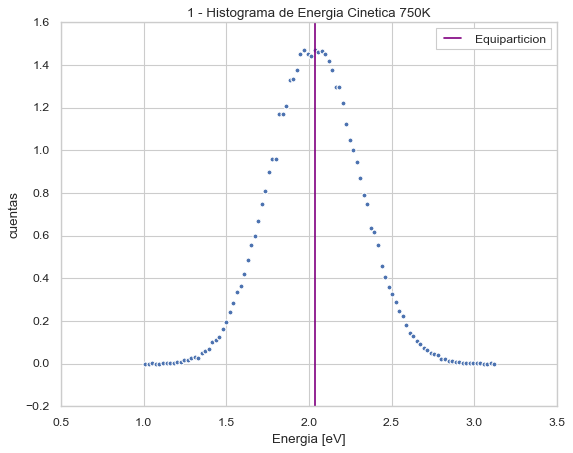

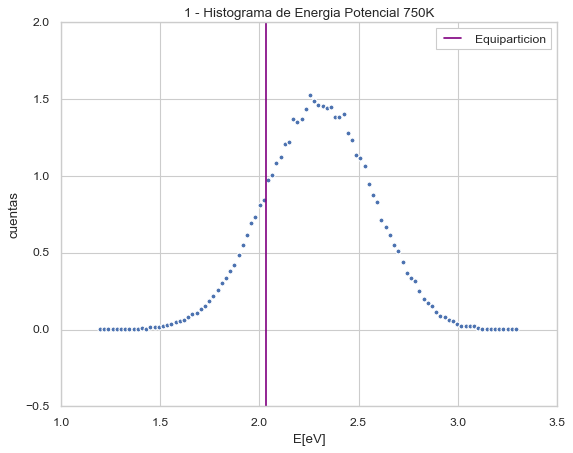

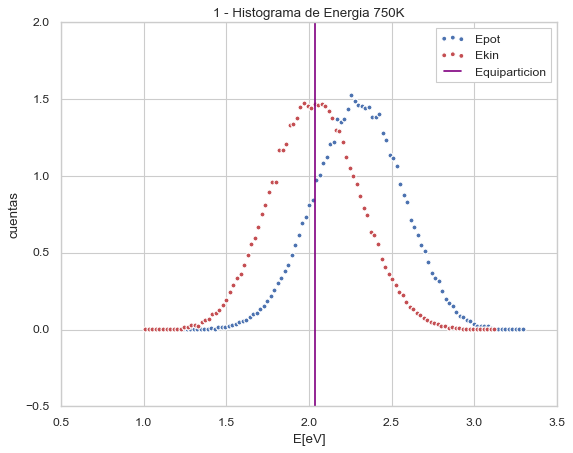

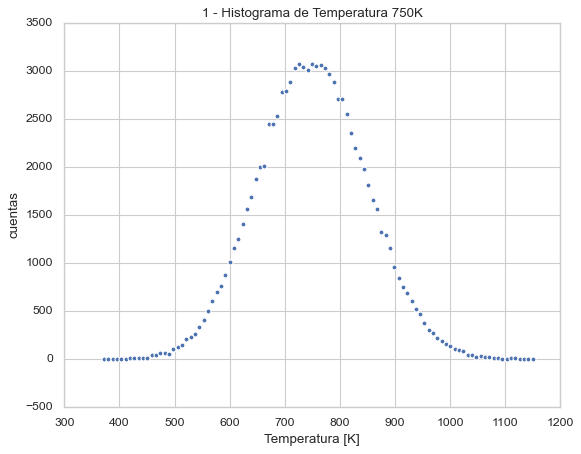

<Figure size 640x480 with 0 Axes>

In [50]:
plt.title(str(num)+' - Histograma de Energia Cinetica '+ str(Temp)+"K")
plt.xlabel('Energia [eV]')
plt.ylabel('cuentas')
plt.scatter(Ekin[0],Ekin[1])
plt.axvline(Ecin ,color="purple",label = 'Equiparticion')
plt.legend()
plt.savefig(path+Title + "Ekin_histogram.png")
plt.show()
plt.clf()

plt.title(str(num)+' - Histograma de Energia Potencial '+ str(Temp)+"K")
plt.xlabel('E[eV]')
plt.ylabel('cuentas')
plt.scatter(Epot[0],Epot[1])
plt.axvline(Ecin ,color="purple",label = 'Equiparticion')
plt.legend()
plt.savefig(path+Title + "Epot_histogram.png")
plt.show()
plt.clf()

plt.title(str(num)+' - Histograma de Energia '+ str(Temp)+"K")
plt.xlabel('E[eV]')
plt.ylabel('cuentas')
plt.scatter(Epot[0],Epot[1],c='b', label = 'Epot')
plt.scatter(Ekin[0],Ekin[1],c='r', label = 'Ekin')
plt.axvline(Ecin ,color="purple",label = 'Equiparticion')
plt.legend()
plt.savefig(path+Title + "E_histogram.png")
plt.show()
plt.clf()

plt.title(str(num)+' - Histograma de Temperatura '+ str(Temp)+"K")
plt.xlabel('Temperatura [K]')
plt.ylabel('cuentas')
plt.scatter(Temp_hist[0],Temp_hist[2])
plt.savefig(path+Title + "temperature_histogram.png")
plt.show()
plt.clf()

## celda

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


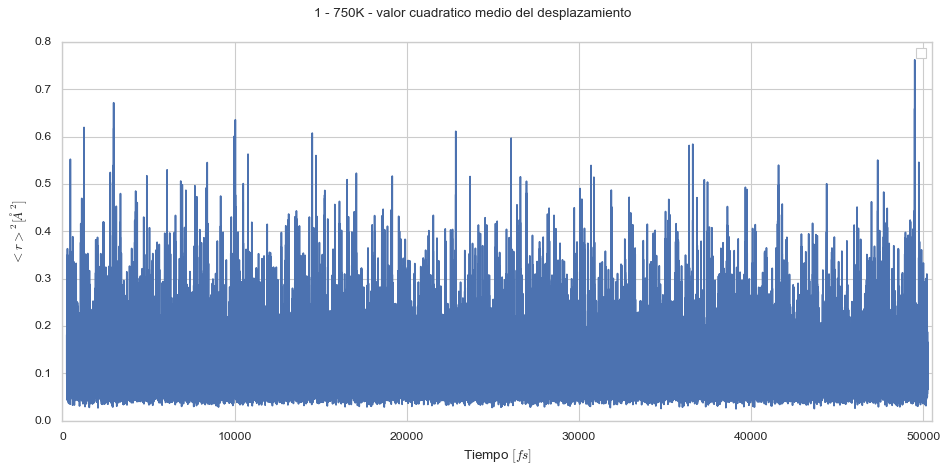

<Figure size 640x480 with 0 Axes>

In [51]:
Plot_Disp(Disp)

# desp ams

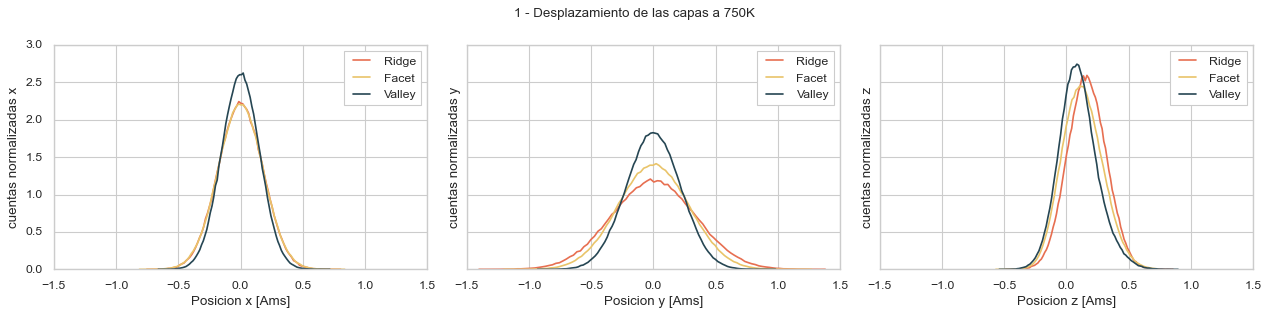

<Figure size 640x480 with 0 Axes>

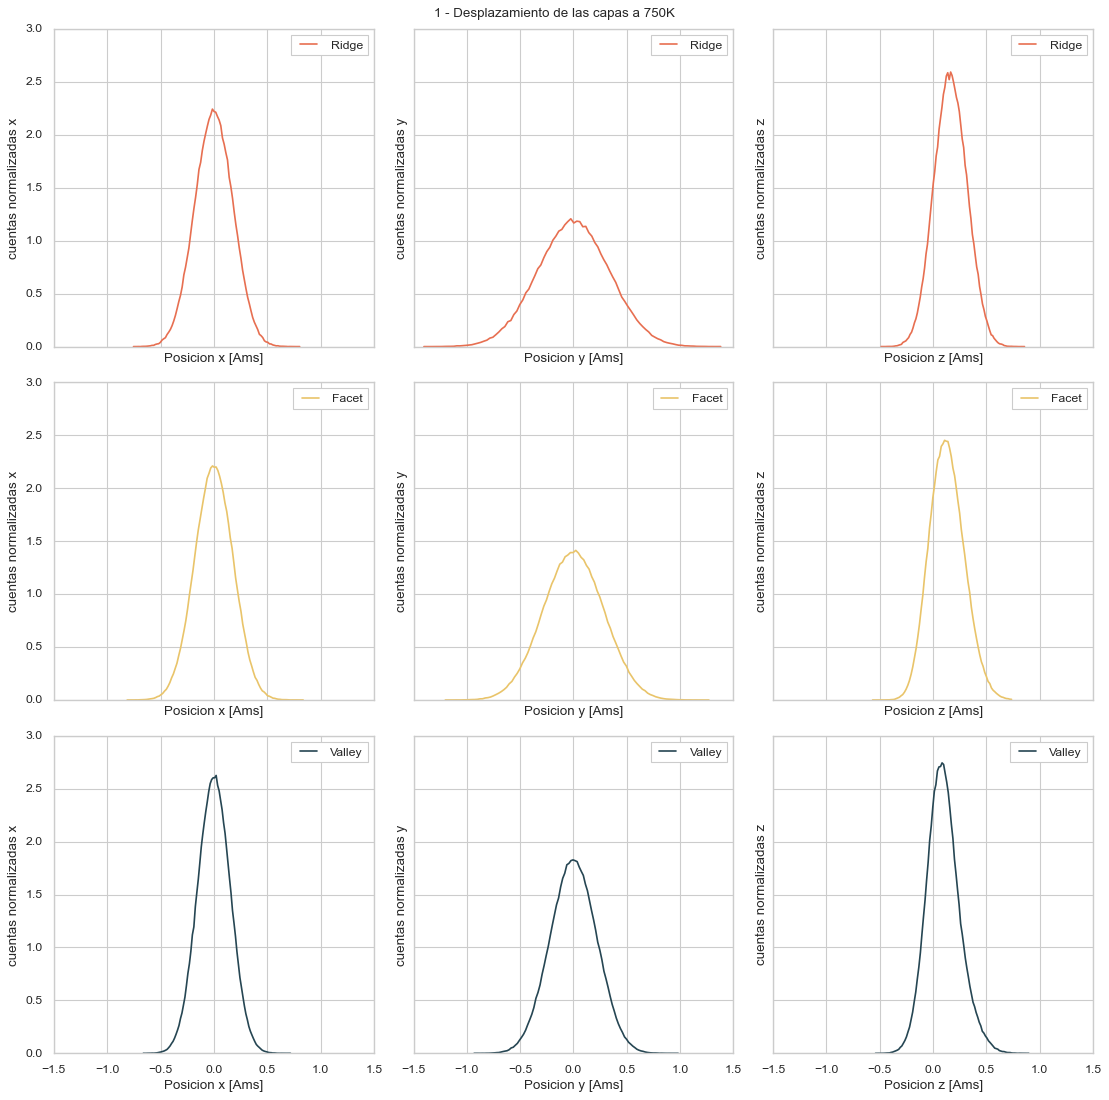

<Figure size 640x480 with 0 Axes>

In [52]:
Plot_multiR(R)
Plot_multi(R)

# Grafica de Energias

# Using seaborn with Ekin as example

pallete="YlGnBu"
Seaborn Datasets    # Ekin = sns.load_dataset("Ekin_histogram.out")
Scatter Plot        # sns.scatterplot(x=Ekin[0],y=Ekin[1], data = Ekin)
Histograms & Distribution Plots # sns.histplot(Ekin[0], c)
                                # sns.displot(Ekin[0], kde = true, bins = 15)
Bar Plot            # sns.barplot(x = Ekin[0],y = Ekin[1], data = Ekin)
Box Plot & Strip Plot# sns.boxplot(x = Ekin[0],y = Ekin[1], data = Ekin, hue = Ekin[2])
Join Plot           # sns.jointplot(x = X1[0],y = X1[1], data = X1, kind = "reg")
                    # sns.jointplot(x = Ekin[0],y = Ekin[1], data = Ekin, kind = "kde", shade=True)
Pair Plot           # sns.pairplot(Ekin) !!(Only numeric database)
Heat Map            #sns.heatmap(correlationmatric, annot=True,cmap="YlGnBu")
Cluster Map         #sns.clustermap(Ekin)
Savefig             #plt.savefig("nombre.png")
"object".set(xscale="log", yscale="log")
"object".ax.xaxis.grid(True, "minor", linewidth=.25)
"object".ax.yaxis.grid(True, "minor", linewidth=.25)
"object".despine(left=True, bottom=True) 

#sns.scatterplot(x = "Posicion Y1",y = "Desp Y1", data = R1)
#sns.scatterplot(x = "Posicion X2",y = "Desp X2", data = R2)
#sns.jointplot(x = "Posicion X2",y = "Desp X2", data = R2, kind ="kde", shade=True)
#sns.pairplot(R3)
#plt.axvline(2.84,color="red")

# Using plt
plt.axhline(y=0, color="black", linestyle="--")
plt.axhline(y=0.5, color="black", linestyle=":")
plt.axhline(y=1.0, color="black", linestyle="--")
plt.axvline(color="grey")
plt.axline((0, 0.5), slope=0.25, color="black", linestyle=(0, (5, 5)))
plt.plot(t, sig, linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlim(-10, 10)
plt.xlabel("t")
plt.legend(fontsize=14)
plt.show()

#X = Coordenate - N = Layer  #header=None
X1 = pd.read_csv("x_layer001_histo_mov.out",delim_whitespace=True,header=None)
dic = {0: "Posicion X1" , 1 : "Desp X1" ,2 : "cuentas X1"}
X1.rename(columns=dic,inplace=True)

Y1 = pd.read_csv("y_layer001_histo_mov.out",delim_whitespace=True,header=None)
dic = {0: "Posicion Y1" , 1 : "Desp Y1" ,2 : "cuentas Y1"}
Y1.rename(columns=dic,inplace=True)

Z1 = pd.read_csv("z_layer001_histo_mov.out",delim_whitespace=True,header=None)
dic = {0: "Posicion Z1" , 1 : "Desp Z1" ,2 : "cuentas Z1"}
Z1.rename(columns=dic,inplace=True)

X2 = pd.read_csv("x_layer002_histo_mov.out",delim_whitespace=True,header=None)
dic = {0: "Posicion X2" , 1 : "Desp X2" ,2 : "cuentas X2"}
X2.rename(columns=dic,inplace=True)

Y2 = pd.read_csv("y_layer002_histo_mov.out",delim_whitespace=True,header=None)
dic = {0: "Posicion Y2" , 1 : "Desp Y2" ,2 : "cuentas Y2"}
Y2.rename(columns=dic,inplace=True)

Z2 = pd.read_csv("z_layer002_histo_mov.out",delim_whitespace=True,header=None)
dic = {0: "Posicion Z2" , 1 : "Desp Z2" ,2 : "cuentas Z2"}
Z2.rename(columns=dic,inplace=True)

X3 = pd.read_csv("x_layer003_histo_mov.out",delim_whitespace=True,header=None)
dic = {0: "Posicion X3" , 1 : "Desp X3" ,2 : "cuentas X3"}
X3.rename(columns=dic,inplace=True)

Y3 = pd.read_csv("y_layer003_histo_mov.out",delim_whitespace=True,header=None)
dic = {0: "Posicion Y3" , 1 : "Desp Y3" ,2 : "cuentas Y3"}
Y3.rename(columns=dic,inplace=True)

Z3 = pd.read_csv("z_layer003_histo_mov.out",delim_whitespace=True,header=None)
dic = {0: "Posicion Z3" , 1 : "Desp Z3" ,2 : "cuentas Z3"}
Z3.rename(columns=dic,inplace=True)

R1= pd.concat([X1,Y1,Z1], axis=1)
R2= pd.concat([X2,Y2,Z2], axis=1)
R3= pd.concat([X3,Y3,Z3], axis=1)

NameError: name 'conv' is not defined

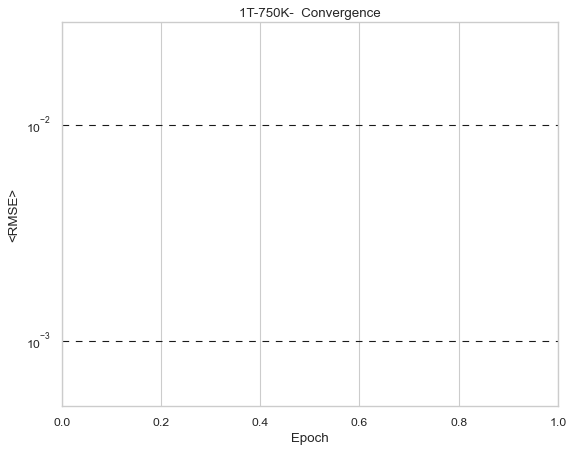

In [53]:
RMSE = 6.703596E-04
RMSE_test = 1.818623E-03
plt.title(Title+' Convergence')
plt.xlabel('Epoch')
plt.ylabel('<RMSE>')
plt.yscale('log')
plt.ylim(0.0005,0.03)
plt.rcParams['font.size'] = 11
plt.grid(which='major',axis = 'y' , linestyle='--', color = 'k')
#plt.plot(conv[0],conv[1], '#264653', label = ' MAE ')
#plt.plot(conv[0],conv[3], '#2a9d8f',linestyle = '--', label = ' MAE Test ') 
plt.plot(conv[0],conv[2], '#e76f51', label = ' RMSE ')
plt.plot(conv[0],conv[4], '#2a9d8f', label = ' RMSE Test ') 
plt.axhline(y=RMSE, color='#e76f51', linestyle='--', label='RMSE filtrado')
plt.axhline(y=RMSE_test, color='#2a9d8f', linestyle='--', label='RMSE Test filtrado')
plt.legend()
#plt.savefig(path+run+'convergence-'+Title+'.png')
plt.show()
plt.clf()